In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

#import sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Ridge, LinearRegression, ElasticNet, Lasso
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

# displaying all the columns and row throughout the notebook
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
df = pd.read_csv(r'C:\Users\ashra\Desktop\Lighthouse Bootcamp\W11-FinalProject\modelling_major_option.csv')
df.head()
df.drop('major options', inplace = True, axis = 1)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1883 entries, 0 to 1882
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   brand           1883 non-null   object 
 1   mileage         1883 non-null   int64  
 2   car-type        1883 non-null   object 
 3   age             1883 non-null   int64  
 4   transmission    1883 non-null   object 
 5   color           1883 non-null   object 
 6   drivetrain      1883 non-null   object 
 7   fuel type       1883 non-null   object 
 8   engine-hp       1883 non-null   float64
 9   engine-l        1883 non-null   float64
 10  engine-type     1883 non-null   object 
 11  location        1883 non-null   object 
 12  no_of_features  1883 non-null   float64
 13  price           1883 non-null   int64  
dtypes: float64(3), int64(3), object(8)
memory usage: 206.1+ KB


In [4]:
Categorial_col = ['brand', 'transmission', 'color', 'drivetrain', 'fuel type', 'engine-type', 'location', 'car-type']

In [5]:
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
encoder_fit = OH_encoder.fit_transform(df[Categorial_col])
column_name = OH_encoder.get_feature_names(Categorial_col)
OH_cols = pd.DataFrame(encoder_fit, columns=column_name)
# One-hot encoding removed index; put it back
OH_cols.index = df.index
# Remove categorical columns (will replace with one-hot encoding)
num_col = df.drop(Categorial_col, axis=1)

In [6]:
num_col

,mileage,age,engine-hp,engine-l,no_of_features,price
0,26000,3,305.000000,3.600000,7.0,38900
1,49000,7,235.000000,2.000000,5.0,28900
2,216288,19,190.000000,3.400000,1.0,11980
3,155000,4,188.000000,3.000000,2.0,38995
4,32575,4,300.000000,3.000000,7.0,42485
5,26000,3,355.000000,5.300000,3.0,38990
6,3800,2,370.000000,6.700000,1.0,72995
7,75000,6,252.000000,2.000000,5.0,17888
8,11030,1,285.000000,3.600000,5.0,59833
9,50146,3,284.000000,3.500000,6.0,33799


In [7]:
df.isnull().sum()
# y = num_col['price']

brand             0
mileage           0
car-type          0
age               0
transmission      0
color             0
drivetrain        0
fuel type         0
engine-hp         0
engine-l          0
engine-type       0
location          0
no_of_features    0
price             0
dtype: int64

In [12]:
num_col.columns

Index(['mileage', 'age', 'engine-hp', 'engine-l', 'no_of_features', 'price'], dtype='object')

In [13]:
# df_after_scaled.columns = ['mileage', 'age', 'engine-hp', 'engine-l', 'no_of_features', 'price']
# df_after_scaled.head()

In [14]:
OH_df = pd.concat([num_col, OH_cols], axis=1)

In [15]:
OH_df.head()

,mileage,age,engine-hp,engine-l,no_of_features,price,brand_Acura,brand_Alfa,brand_Audi,brand_BMW,brand_Buick,brand_Cadillac,brand_Chevrolet,brand_Chrysler,brand_Dodge,brand_FIAT,brand_Ford,brand_GMC,brand_Genesis,brand_Honda,brand_Hyundai,brand_INFINITI,brand_Jaguar,brand_Jeep,brand_Kia,brand_Land,brand_Lexus,brand_Lincoln,brand_MINI,brand_Maserati,brand_Mazda,brand_Mercedes-Benz,brand_Mitsubishi,brand_Nissan,brand_Pontiac,brand_Porsche,brand_RAM,brand_Scion,brand_Subaru,brand_Tesla,brand_Toyota,brand_Volkswagen,brand_Volvo,brand_smart,transmission_Automatic,transmission_Manual,color_Black,color_Blue,color_Gray,color_Green,color_Orange,color_Other,color_Red,color_Silver,color_White,drivetrain_All-Wheel Drive,drivetrain_Four-Wheel Drive,drivetrain_Front-Wheel Drive,drivetrain_Rear-Wheel Drive,fuel type_Biodiesel,fuel type_Diesel,fuel type_Electric,fuel type_Flex Fuel Vehicle,fuel type_Gasoline,fuel type_Hybrid,engine-type_I3,engine-type_I4,engine-type_I5,engine-type_I6,engine-type_V6,engine-type_V8,location_Abbotsford,location_Aldergrove,location_Burnaby,location_Chilliwack,location_Coquitlam,location_Delta,location_Duncan,location_Langley,location_Langley City,location_Maple Ridge,location_Mission,location_Nanaimo,location_New Westminster,location_North Vancouver,location_Parksville,location_Pitt Meadows,location_Port Coquitlam,location_Port Moody,location_Richmond,location_Sechelt,location_Sidney,location_Squamish,location_Surrey,location_Vancouver,location_Victoria,location_Westshore,car-type_Acura ILX FWD with Premium Package,car-type_Acura ILX FWD with Technology Plus Package,car-type_Acura ILX FWD with Technology and A-Spec Package,car-type_Acura MDX,car-type_Acura MDX AWD with Touring Package,car-type_Acura MDX SH-AWD with Technology Package,car-type_Acura MDX SH-AWD with Technology and A-SPEC Package,car-type_Acura RDX SH-AWD,car-type_Acura RDX SH-AWD with A-Spec Package,car-type_Acura RDX SH-AWD with Technology Package,car-type_Acura TL SH-AWD with Technology Package,car-type_Acura TLX A-Spec FWD with Technology Package,car-type_Acura TLX FWD,car-type_Acura TLX FWD with Technology Package,car-type_Acura TLX SH-AWD with A-Spec Package,car-type_Alfa Romeo Giulia AWD,car-type_Alfa Romeo Giulia Ti RWD,car-type_Alfa Romeo Stelvio Sport AWD,car-type_Audi RS 5 quattro Cabriolet AWD,car-type_Audi S4 quattro Cabriolet AWD,car-type_BMW 2 Series 228i xDrive Convertible AWD,car-type_BMW 2 Series 228i xDrive Gran Coupe AWD,car-type_BMW 2 Series 230i Coupe RWD,car-type_BMW 2 Series 230i xDrive Coupe AWD,car-type_BMW 2 Series M235i Coupe RWD,car-type_BMW 3 Series 320i xDrive Sedan AWD,car-type_BMW 3 Series 328d xDrive Sedan AWD,car-type_BMW 3 Series 328i Sedan RWD,car-type_BMW 3 Series 328i xDrive Sedan AWD,car-type_BMW 3 Series 330i xDrive AWD,car-type_BMW 3 Series 330i xDrive Sedan AWD,car-type_BMW 3 Series 335i Convertible RWD,car-type_BMW 3 Series 335i xDrive Sedan AWD,car-type_BMW 3 Series 340i xDrive Sedan AWD,car-type_BMW 3 Series Gran Turismo 328i xDrive AWD,car-type_BMW 3 Series Gran Turismo 340i xDrive AWD,car-type_BMW 3 Series M340i xDrive AWD,car-type_BMW 4 Series 430i xDrive Convertible AWD,car-type_BMW 4 Series 430i xDrive Coupe AWD,car-type_BMW 4 Series 430i xDrive Gran Coupe AWD,car-type_BMW 4 Series 435i xDrive Convertible AWD,car-type_BMW 4 Series 435i xDrive Coupe AWD,car-type_BMW 4 Series 435xi xDrive Coupe AWD,car-type_BMW 4 Series 440i xDrive Convertible AWD,car-type_BMW 4 Series M440i Convertible RWD,car-type_BMW 5 Series 525i Sedan RWD,car-type_BMW 5 Series 528i xDrive Sedan AWD,car-type_BMW 5 Series 530i Sedan RWD,car-type_BMW 5 Series 530i xDrive Sedan AWD,car-type_BMW 5 Series 550i Sedan RWD,car-type_BMW 5 Series 550i xDrive Sedan AWD,car-type_BMW 6 Series 650i xDrive Gran Coupe AWD,car-type_BMW 6 Series Gran Turismo 640i xDrive AWD,car-type_BMW 7 Series 750Li RWD,car-type_BMW 7 Series 750i xDrive AWD,car-type_BMW M2 RWD,car-type_BMW M3 Coupe RWD,car-type_BMW M4 CS Coupe RWD,car-type_BMW M4 Convertible RWD,

In [16]:
y=OH_df['price']
X= OH_df.drop('price', axis = 1)

In [17]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=0)

In [18]:
X_train.shape

(1506, 1032)

In [19]:
lm = LinearRegression()
lm_scores = -1*cross_val_score(lm, X_train, y_train, scoring = 'neg_mean_absolute_error', cv = 5)
print("MAE score: {} and standard deviation {}".format(round(np.mean(lm_scores)), 
                                                        round(np.std(lm_scores))))

MAE score: 2174699216 and standard deviation 2278257235


In [20]:
rr = Ridge(alpha=0.01)
rr_scores = -1*cross_val_score(rr, X_train, y_train, scoring = 'neg_mean_absolute_error', cv = 5)
print("MAE score: {} and standard deviation {}".format(round(np.mean(rr_scores)), 
                                                        round(np.std(rr_scores))))

MAE score: 5333 and standard deviation 481


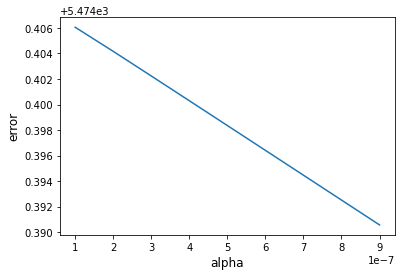

In [21]:
#ref: https://github.com/PlayingNumbers/ds_salary_proj/blob/master/model_building.py
alpha = []
error = []

for i in range(1,10) :
    alpha.append(i/1e7)
    rr = Ridge(alpha=(i/1e7))
    error.append(np.mean(-1*cross_val_score(rr, X_train, y_train, 
                                            scoring = 'neg_mean_absolute_error')))
plt.xlabel('alpha', fontsize=12)
plt.ylabel('error', fontsize=12)
plt.plot(alpha,error);

In [22]:
rr_min = Ridge(alpha=9e-7)
rr_min_scores = -1*cross_val_score(rr_min, X_train, y_train, 
                                   scoring = 'neg_mean_absolute_error', cv = 5)
print("MAE score: {} and standard deviation {}".format(round(np.mean(rr_min_scores)), 
                                                        round(np.std(rr_min_scores))))

MAE score: 5474 and standard deviation 579


Lasso regression


In [23]:
ls = Lasso(alpha = 0.01)
ls_scores = -1*cross_val_score(ls, X_train, y_train, scoring = 'neg_mean_absolute_error', cv = 5)
print("MAE score: {} and standard deviation {}".format(round(np.mean(ls_scores)), 
                                                        round(np.std(ls_scores))))

MAE score: 5533 and standard deviation 559


Elastic net

In [24]:
en = ElasticNet(alpha = 0.01)
en_scores = -1*cross_val_score(en, X_train, y_train, scoring = 'neg_mean_absolute_error', cv = 5)
print("MAE score: {} and standard deviation {}".format(round(np.mean(en_scores)), 
                                                        round(np.std(en_scores))))

MAE score: 5861 and standard deviation 206


Random Forest regression

In [25]:
rf = RandomForestRegressor(random_state = 0)
rf_scores = -1*cross_val_score(rf, X_train, y_train, scoring = 'neg_mean_absolute_error', cv = 5)
print("MAE score: {} and standard deviation {}".format(round(np.mean(rf_scores)), 
                                                        round(np.std(rf_scores))))
rf.fit(X_valid, y_valid)
a = rf.score(X_valid, y_valid)
a

MAE score: 4957 and standard deviation 234


0.9709492415651281

XGBoost

In [26]:
xg = XGBRegressor()
xg_scores = -1*cross_val_score(xg, X_train, y_train, scoring = 'neg_mean_absolute_error', cv = 5)
print("MAE score: {} and standard deviation {}".format(round(np.mean(xg_scores)), 
                                                        round(np.std(xg_scores))))
xg.fit(X_valid, y_valid)
a = xg.score(X_valid, y_valid)
a

MAE score: 4422 and standard deviation 179


0.9969977165346848

In [27]:
# Hyper-Parameter Tuning

Best parameter is {'n_estimators': 350} with MAE score 4198


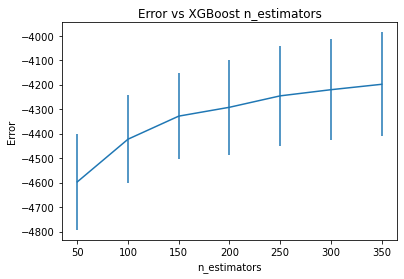

In [28]:
n_estimators = range(50, 400, 50)
parameters = {'n_estimators': n_estimators}
gs = GridSearchCV(xg, parameters, scoring='neg_mean_absolute_error', n_jobs = -1)
gs_result=gs.fit(X_train,y_train);
# results
means = gs_result.cv_results_['mean_test_score']
stds = gs_result.cv_results_['std_test_score']
#best parameter
print('Best parameter is {} with MAE score {}'.format(gs.best_params_, round(-1*gs.best_score_)))
#Plot
plt.errorbar(n_estimators, means, yerr=stds);
plt.title("Error vs XGBoost n_estimators")
plt.xlabel('n_estimators')
plt.ylabel('Error')
plt.show()

Best parameter is {'max_depth': 6, 'n_estimators': 250} with MAE score 4245


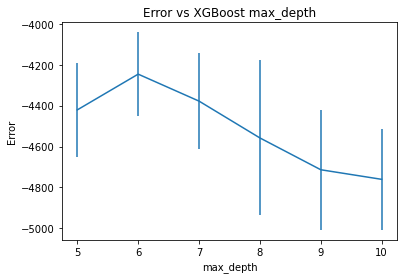

In [29]:
max_depth=range(5,11)
parameters_1 = {'max_depth':max_depth, 'n_estimators': [250]}
gs1 = GridSearchCV(xg, param_grid = parameters_1, scoring='neg_mean_absolute_error', n_jobs = -1)
gs1_result=gs1.fit(X_train,y_train)
# results
means1 = gs1_result.cv_results_['mean_test_score']
stds1 = gs1_result.cv_results_['std_test_score']
#best parameter
print('Best parameter is {} with MAE score {}'.format(gs1.best_params_, round(-1*gs1.best_score_)))
#Plot
plt.errorbar(max_depth, means1, yerr=stds1);
plt.title("Error vs XGBoost max_depth")
plt.xlabel('max_depth')
plt.ylabel('Error')
plt.show()

In [30]:
gs1.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=250, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [31]:
xgf = gs1.best_estimator_
xgf_scores = -1*cross_val_score(xgf, X_train, y_train, 
                               scoring = 'neg_mean_absolute_error', cv = 5)
print("MAE score: {} and standard deviation {}".format(round(np.mean(xgf_scores)), 
                                                        round(np.std(xgf_scores))))

MAE score: 4245 and standard deviation 205


In [32]:
import xgboost as xgb
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [33]:
xg_reg.fit( X_train, y_train)

[20:42:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=10, n_jobs=8,
             num_parallel_tree=1, objective='reg:linear', predictor='auto',
             random_state=0, reg_alpha=10, reg_lambda=1, scale_pos_weight=1,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [34]:
preds = xg_reg.predict(X_valid)

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mse = mean_squared_error(y_valid, preds)
print('MSE: %f' %(mse))

MSE: 332119156.116325


In [36]:
rmse = np.sqrt(mean_squared_error(y_valid, preds))
print('RMSE: %f' %(rmse))

RMSE: 18224.136636


In [37]:
from sklearn.metrics import r2_score
r2_score_xgb = r2_score(y_valid, preds)
print(r2_score_xgb)

0.09655970712529494


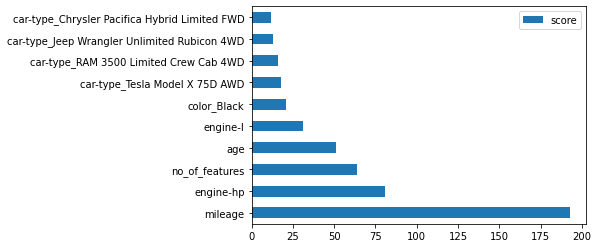

In [38]:
feature_important = xg.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data[:10].plot(kind='barh');